In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
do = pd.read_csv("./train.csv")
do.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
do.shape

(42000, 785)

In [6]:
l= do["label"]

In [7]:
d = do.drop("label",axis =1)

In [8]:
l.shape

(42000,)

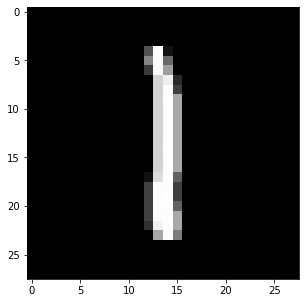

1

In [9]:
plt.figure(figsize=(5,5))
idx = 1000
grid_data = d.iloc[idx].values.reshape(28,28)
plt.imshow(grid_data,interpolation = None,cmap="gray")
plt.show()
l[idx]

In [10]:
labels = l.head(15000)
data = d.head(15000)
data.shape

(15000, 784)

In [11]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
standardized_data.shape

(15000, 784)

In [12]:
sample_data = standardized_data
covar_matrix = np.matmul(sample_data.T,sample_data)
covar_matrix.shape

(784, 784)

In [13]:
from scipy.linalg import eigh
values,vectors = eigh(covar_matrix,eigvals =(782,783))
vectors.shape

(784, 2)

In [14]:
vectors = vectors.T
vectors.shape

(2, 784)

In [19]:
import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors,sample_data.T)
print("Resultant new data points shape",vectors.shape,"X",sample_data.T.shape,"=" ,new_coordinates.shape)

Resultant new data points shape (2, 784) X (784, 15000) = (2, 15000)


In [20]:
import pandas as pd
new_coordinates = np.vstack((new_coordinates,labels)).T
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


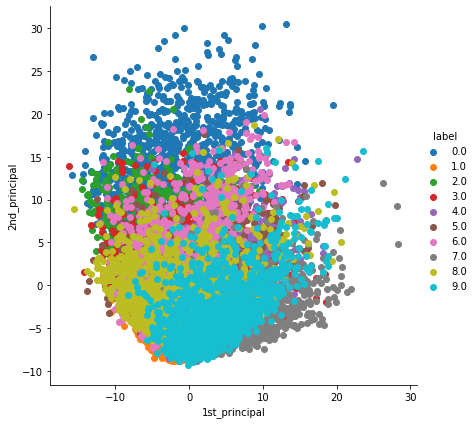

In [21]:
import seaborn as sns
sns.FacetGrid(dataframe, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [22]:
# Implementing PCA using scikit learn
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

#pca reduced will contain the 2d projects of simple data
print("shape of pca_reduced.shape =", pca_data.shape)

shape of pca_reduced.shape = (15000, 2)


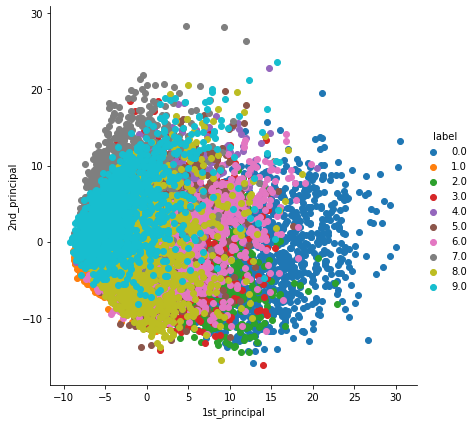

In [23]:
pca_data = np.vstack((pca_data.T, labels)).T

pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sns.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()


In [33]:
# t-SNE using scikit-Learn
from sklearn.manifold import TSNE

In [34]:
data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]

In [37]:
model =TSNE(n_components = 2,random_state = 0)
tsne_data = model.fit_transform(data_1000)

In [38]:
tsne_data = np.vstack((tsne_data.T,labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data,columns=("Dim_1","Dim_2","label"))

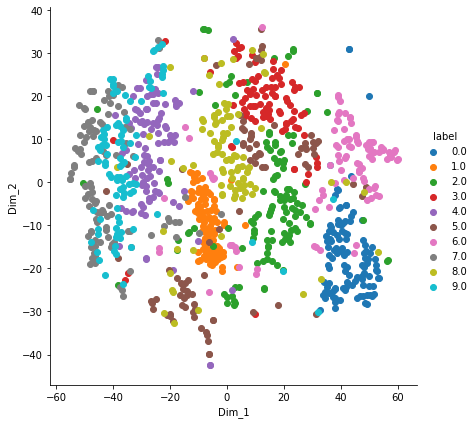

In [39]:
sns.FacetGrid(tsne_df,hue ="label",height = 6).map(plt.scatter,"Dim_1","Dim_2").add_legend()
plt.show()

c:\users\bibhuti\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


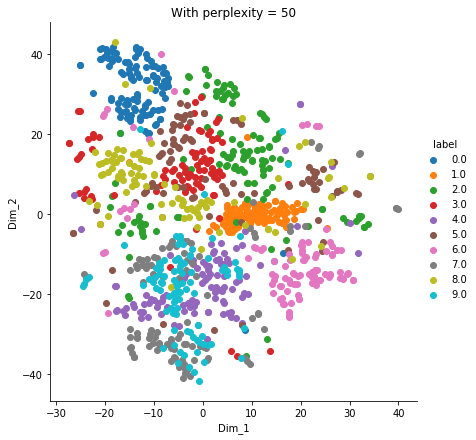

In [41]:
# Variation of t-SNE with perplexity 50
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(data_1000) 

tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

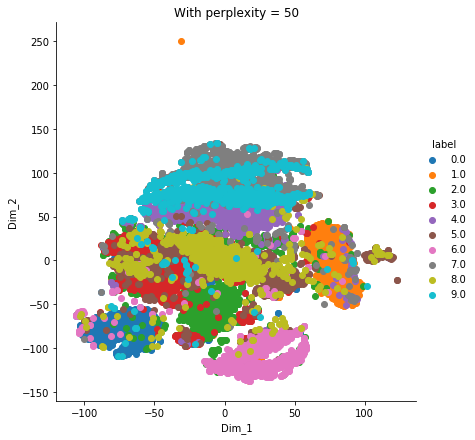

In [43]:
# Variation of t-SNE with perplexity 50 ,data = 15k
data_15000 = standardized_data[0:15000,:]
labels_15000 = labels[0:15000]
standardized_data = StandardScaler().fit_transform(data_15000)
standardized_data.shape

model = TSNE(n_components=2, random_state=0, perplexity=50,n_iter = 5000)
tsne_data = model.fit_transform(data_15000) 

tsne_data = np.vstack((tsne_data.T, labels_15000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sns.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()